## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [0]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np
import math 
import pandas as pd  # To read in the dataset we will use the Panda's library
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.tail()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [0]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

Using a scatter plot to visualize the dataset

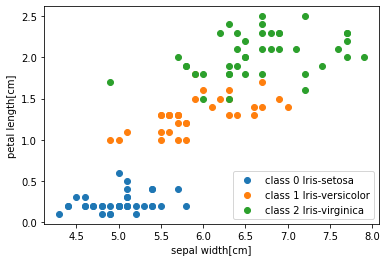

In [0]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

In [0]:
def euclidean_distance(x1, x2):
    #suppose that x1:(1,2) x2:(N*3) 
    sum_squared = 0
    for i in range(len(x2)):
      sum_squared += math.pow(x1[i]-x2[i],2)
    return math.sqrt(sum_squared)

print(euclidean_distance(X_test[0],X_train[0]))

0.9055385138137416


In [0]:
def get_neighbors( X_train, y_train, x_test, k, distance= euclidean_distance):
    # X in N*2, y in N*1, x_test in 2,
    # calculate all the distances
    # find the nearest K nieghtbors' indexs
    # return k nerest negibors

    #calculate all the distances between the query and every element in X_train
    distances = []
    for train in X_train:
      distances.append((train,(distance(train,x_test))))
    #sort the distances
    distances.sort(key=lambda tup: tup[1])

    #get the indexes of the distances
    knn_indexes = []
    knn_labels = []
    for nn in range(k):
      index = np.where((X_train == distances[nn][0]).all(axis=1))[0][0]
      knn_indexes.append(index)
      knn_labels.append(y_train[index])

    # print(knn_labels)
  
    

    return knn_labels

get_neighbors(X_train,y_train,X_test[0],20)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]

In [0]:
import operator
def get_label(neighbors_labels):
    # calculate and return label with the majority votes
    votes = dict( (l, neighbors_labels.count(l) ) for l in set(neighbors_labels))
    sorted_votes = sorted(votes.items(), key=lambda x: x[1])
    label = sorted_votes[len(sorted_votes)-1][0]
    # print(label)


    return label


In [0]:
def knn(training_data,y_train,testing_data,k,distance= euclidean_distance):
    # for each testing data, using functions above to predict the class labes using knn algo
    testing_data_labels = []
    for query in testing_data:
      neighbor_labels = get_neighbors(training_data,y_train,query,k,distance)
      query_label = get_label(neighbor_labels)
      testing_data_labels.append(query_label)

      

    return testing_data_labels
testing_data_labels = knn(X_train,y_train,X_test,20,distance= euclidean_distance)

In [0]:
def eval(y_test,pred):
    y_size = len(y_test)
    nmc = 0
    for i in range(y_size):
      if(y_test[i] != pred[i] ):
        nmc+=1
    
    accuracy = (y_size - nmc)/y_size

    return accuracy

In [0]:
# K=1
testing_data_labels_k1 = knn(X_train,y_train,X_test,1,distance= euclidean_distance)
accuracy_k1 = eval(y_test,testing_data_labels_k1 )
print("Accuracy for K = 1: ",accuracy_k1)

Accuracy for K = 1:  0.9210526315789473


In [0]:
# K=3
testing_data_labels_k3 = knn(X_train,y_train,X_test,3,distance= euclidean_distance)
accuracy_k3 = eval(y_test,testing_data_labels_k3 )
print("Accuracy for K = 3: ",accuracy_k3)

Accuracy for K = 3:  0.9210526315789473


In [0]:
# K=5
testing_data_labels_k5 = knn(X_train,y_train,X_test,5,distance= euclidean_distance)
accuracy_k5 = eval(y_test,testing_data_labels_k5 )
print("Accuracy for K = 5: ",accuracy_k5)

Accuracy for K = 5:  0.9473684210526315


In [0]:
def mydistance(x1, x2):
    #Manhattan Distance
    difference = 0
    for i in range(len(x2)):
      difference += abs(x2[i]-x1[i])
    return difference
    


In [0]:
# K=1
testing_data_labels_k1 = knn(X_train,y_train,X_test,1,distance= mydistance)
accuracy_k1 = eval(y_test,testing_data_labels_k1 )
print("Accuracy for K = 1 using Manhattan Distance: ",accuracy_k1)

Accuracy for K = 1 using Manhattan Distance:  0.9210526315789473


In [0]:
# K=3
testing_data_labels_k3 = knn(X_train,y_train,X_test,3,distance= mydistance)
accuracy_k3 = eval(y_test,testing_data_labels_k3 )
print("Accuracy for K = 3 using Manhattan Distance: ",accuracy_k3)

Accuracy for K = 3 using Manhattan Distance:  0.9210526315789473


In [0]:
# K=5
testing_data_labels_k5 = knn(X_train,y_train,X_test,5,distance= mydistance)
accuracy_k5 = eval(y_test,testing_data_labels_k5 )
print("Accuracy for K = 5 using Manhattan Distance: ",accuracy_k5)

Accuracy for K = 5 using Manhattan Distance:  0.9473684210526315


###Resorces 
- https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

- 

- Questions 4,6,7. For k = 1,2,3, which examples were not correctly classified? 

Those that were really far away from the knn perimeter. As we increased the # of ks, (from 1 to 3), we can see that our accuracy increases as we allow for more neighbors in the perimeter. 


- Question 10: I choose
<a href="https://xlinux.nist.gov/dads/HTML/manhattanDistance.html">Manhattan Distance</a> formula as it is suited for high dimensional data, which I thought might help for data points that are farther away from the knn perimeter. Although it wasnt better, this distance formula proved to be equally perfomant as euclidean distance for this dataset.

